# Data Cleaning

## Background

There is increased competition in the space for coding bootcamps. Bootcamps such as Hack Reactor, Vertical Institute, Rocket Academy and Le Wagon. If no action is taken, there will be a decline in market share, poor marketing return of investment (ROI), poorer lead generation which means we will not be able to meet the enrollment KPI's.

GA marketing is therefore trying to figure out how to better identify the online persona of a bootcamp seeker as opposed to that of a computer science major to aid in targeted advertising.


Considering the two topics have quite a bit in common, efforts to further segregate the two targets could yield better advertising ROI.


## Problem Statement

Due to increased competition in the market for bootcamps. General Assembly has been facing poorer enrollments and they intend to maintain their position as one of the better bootcamps out there.We are team of data scientists that are being tasked by General Assembly to build a model with >90% accuracy that helps to identify between those who are looking for bootcamp style learning vs computer science majors/prospective students based on the words they use online.

## Data Dictionary

| Feature | Type | Dataset | Description|
| :--- | :--- | :--- | :--- |
| subreddit | Object | cs_major / coding_bootcamp | Subreddit contains the topic of the subreddit in the dataframe. Either cs Major or coding bootcamp|
| selftext | Object | cs_major / coding_bootcamp | selftext contains the text or the message of the post written by the end user. |
| title | Object | cs_major / coding_bootcamp | title contains the title of the post. |
| csMajors | Object | cs_major | csMajors is the topic or also known as the subreddit. csMajors refers to Computer Science Major that universities offers to students. |
| coding_bootcamp | Object | coding_bootcamp| coding_bootcamp is the topic or also known as the subreddit. coding_bootamp refers to coding bootcamps that are taken by mid-career switches, companies and students who are interested in upskilling. | 
| combined_text | Object | cs_major / coding_bootcamp | combined_text is the combined columns of selftext and title. |

## Import Libraries

In [53]:
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline
# Set the default text font size
plt.rc('font', size=15)
# Set the axes title font size
plt.rc('axes', titlesize=18)


import string
import re
import nltk


from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

wn = nltk.WordNetLemmatizer()
stopwords = nltk.corpus.stopwords.words('english')

pd.set_option('display.max_colwidth', 100)
import warnings
warnings.filterwarnings('ignore')

## Load dataset from .csv files

In [2]:
cs = pd.read_csv('data/cs_major.csv')
bc = pd.read_csv('data/coding_bootcamp.csv')

We will input variables for each subreddit dataframe to be used through the cleaning. The next steps will be to check for null and duplicated values.

### Checking for Null values

In [3]:
#check for null values for each subreddit
print(cs.isna().sum())
cs.head()
print(bc.isna().sum())
bc.head()

subreddit      0
selftext     198
title          0
dtype: int64
subreddit      0
selftext     991
title          0
dtype: int64


,subreddit,selftext,title
0,codingbootcamp,NaN,Sentiment analysis of YouTube comments in Javascript.
1,codingbootcamp,I am heavily dependent on MATLAB with some experience in R and Python. I’d love any general YouT...,YouTube recs (C specifically)
2,codingbootcamp,"I definitely didn't do so well on the typing portion, but I feel confident on the other two area...",I just submitted the assessment to App Academy!
3,codingbootcamp,How are you coping with the feeling of not having time to 100% commit everything to memory? I am...,How much information do you feel like you are really digesting?
4,codingbootcamp,Sup all. I joined a coding bootcamp that I'm pretty sure I'm gonna fail out of. Holidays got in ...,Really feeling defeated


As there are lots of null values from the selftext column we can assume that the message has been pointed out in the title by the user. Hence, I am going to merge these 2 columns together to rectify this.

### Checking for duplicated values

In [4]:
cs.duplicated().sum()

0

In [5]:
bc.duplicated().sum()

0

Good there are no duplicated values in the datasets. Duplicated values can affect the model as it will seem to have a bias.

We have found out that there are posts that were removed and deleted. These posts do not contribute to the end goal hence we will be replacing them with an empty strings.

In [ ]:
# Remove the words [removed] and [deleted] from selftexts
df['selftext'] = df['selftext'].replace('[removed]', '')
df['selftext'] = df['selftext'].replace('[deleted]', '')

### Combining the columns and filling null values

We will be filling the null values with an empty string and then combining the 2 columns; 'selftext' and 'title' and forming a new column called 'combined_text'. The purpose of this is to simplify things and it will be easier to apply vectorisation later.

In [6]:
#filling null values with an empty string
cs.fillna('',inplace = True)

# combine both title and selftext as a new column
cs['combined_text'] = cs['selftext'] + ' ' + cs['title']
cs.drop(axis = 1, columns = cs[['selftext', 'title']], inplace = True)


#Checking for null values and its shape (rows, columns)
print(cs.isna().sum())
print(cs.shape)
cs.head() # check dataframe

subreddit        0
combined_text    0
dtype: int64
(4000, 2)


,subreddit,combined_text
0,csMajors,"I recently accepted my first job offer, I will be starting in June. I’ve previously spoken to th..."
1,csMajors,Sed Update: Took a month to hear back from Cap One just to get rejected
2,csMajors,Wanted to make a post about this to hopefully inspire some other people who go to low ranked sch...
3,csMajors,How to renegotiate intern offer or try to get it in a different time such as fall or spring ins...
4,csMajors,"I applied to around 200 internships this season and I ended up receiving two offers, one from UH..."


In [7]:
#filling null values with an empty string
bc.fillna('', inplace = True)

#combine both title and selftext as a new column
bc['combined_text'] = bc['selftext'] + ' ' + bc['title']
bc.drop(axis = 1, columns = bc[['selftext', 'title']], inplace = True)
bc.head()

#Checking for null values and its shape (rows, columns)
print(bc.isna().sum())
print(bc.shape)
cs.head() #check dataframe

subreddit        0
combined_text    0
dtype: int64
(4000, 2)


,subreddit,combined_text
0,csMajors,"I recently accepted my first job offer, I will be starting in June. I’ve previously spoken to th..."
1,csMajors,Sed Update: Took a month to hear back from Cap One just to get rejected
2,csMajors,Wanted to make a post about this to hopefully inspire some other people who go to low ranked sch...
3,csMajors,How to renegotiate intern offer or try to get it in a different time such as fall or spring ins...
4,csMajors,"I applied to around 200 internships this season and I ended up receiving two offers, one from UH..."


### Clean Text Function

We will be creating a function that will do the following things. It will remove punctuation, lowercase them and place it into a list, tokenize the text (seperate each word with a comma), remove stopwords (common words like 'i', 'the','and'), and lemmatize the words at the same time (sourcing out the root word via the WordNet Database).

In [8]:
#create function to clean text, remove punctuation
def clean_text(text):
    text = str(text)
    #removing punctuation and lowercasing them
    text =  "".join([word.lower() for word in text if word not in string.punctuation])  
    tokens = re.split('\W+', text) #tokenizing the text (separating each word)
    
    # apply lemmatize and stopwords exclusion within the same step
    text = [wn.lemmatize(word) for word in tokens if word not in stopwords]
    return text 

#apply the function into a new column and dropping the older column
cs['combined_text_clean'] = cs['combined_text'].apply(lambda x: clean_text(x))
cs.drop(axis = 1, columns = 'combined_text',inplace = True)


#apply the function into a new column and dropping the older column
bc['combined_text_clean'] = bc['combined_text'].apply(lambda x: clean_text(x))
bc.drop(axis = 1, columns = 'combined_text',inplace = True)


In [9]:
#saving cleaned dataset for future use
bc.to_csv('data/bc_clean.csv', index = False)
cs.to_csv('data/cs_clean.csv', index = False)

## EDA

### Vectorise Data

Vectorising is the process of encoding text as integers to create a feature vector which is an n-dimensional vector of numerical features that represent an object. We will be trying out 3 different methods of vectorisation, Count Vectorisation, N-grams and TF-IDF.

In [10]:
#loading the clean dataset to differentiate. N-grams uses a different method of cleaning.
cs_clean = pd.read_csv('data/cs_clean.csv')
bc_clean = pd.read_csv('data/bc_clean.csv')

### Count Vectorisor with N-gram (2,2)

Here we will combine count vectorisation with N-gram (2,2) which is a bigram. A bigram is a collection of 2 words together.

In [11]:
#read new csv files for ngram
cs_ngram = pd.read_csv('data/cs_major.csv')
bc_ngram = pd.read_csv('data/coding_bootcamp.csv')

cs_ngram.fillna('',inplace = True)
cs_ngram['combined_text'] = cs_ngram['selftext'] + ' ' + cs_ngram['title']
cs_ngram.drop(axis = 1, columns = cs_ngram[['selftext', 'title']], inplace = True)

bc_ngram.fillna('', inplace = True)
bc_ngram['combined_text'] = bc_ngram['selftext'] + ' ' + bc_ngram['title']
bc_ngram.drop(axis = 1, columns = bc_ngram[['selftext', 'title']], inplace = True)

In [12]:
#create function to clean text, remove punctuation
def clean_text(text):
    text = str(text)
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    
    # apply lemmatize and stopwords exclusion within the same step
    text = ' '.join([wn.lemmatize(word) for word in tokens if word not in stopwords])
    return text

cs_ngram['combined_text_clean'] = cs_ngram['combined_text'].apply(lambda x: clean_text(x))
cs_ngram.drop(axis = 1, columns = 'combined_text',inplace = True)
bc_ngram['combined_text_clean'] = bc_ngram['combined_text'].apply(lambda x: clean_text(x))
bc_ngram.drop(axis = 1, columns = 'combined_text',inplace = True)


In [13]:
#for cs major
# ngram_range refers to the range of n-grams that we would like to look for. In this case, (2,2) = bigrams 

cvec = CountVectorizer(analyzer='word',ngram_range=(2,2))
X_counts_ngram = cvec.fit_transform(cs_ngram['combined_text_clean'])
#Returns number of rows and columns
print(X_counts_ngram.shape)

cs_cvec = pd.DataFrame(X_counts_ngram.toarray())
cs_cvec.columns = cvec.get_feature_names()

cs_cvec.to_csv('data/cs_cvec.csv')#save to csv
cs_cvec.head()



(4000, 90813)


,000 flip,001 010,001 offer,01 job,010 011,011 100,012 still,02 count,0415 1515,0719 recruiter,...,zybooks feel,zybooksa program,ƒor leetcode,άλλο else,για το,και μηδεν,μηδεν για,τιμη για,το άλλο,το και
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:title={'center':'Top 20 Bi-gram CS Major'}, ylabel='Words'>

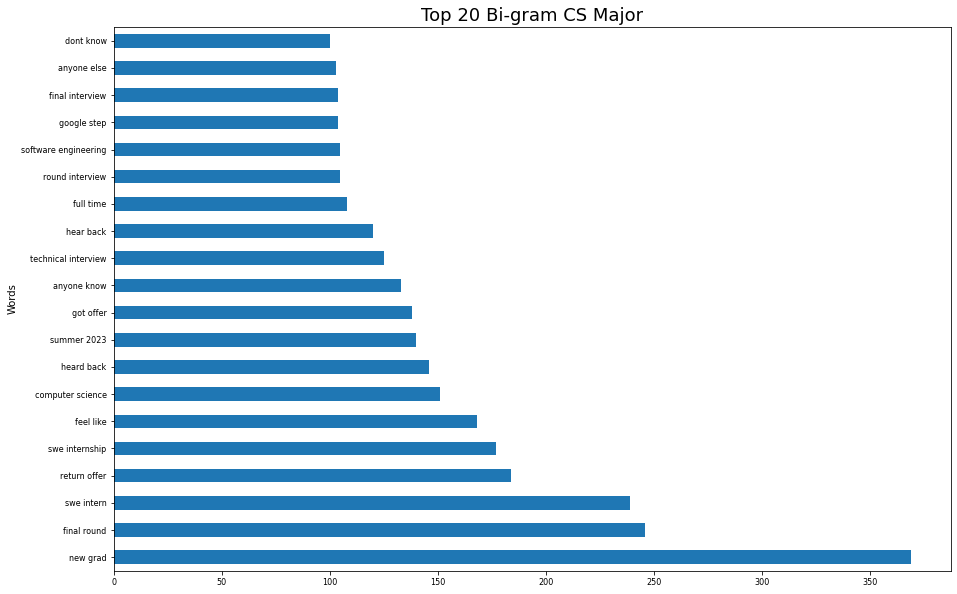

In [65]:
cs_cvec.sum().sort_values(ascending = False).head(20).plot(kind = 'barh',
                                                           figsize=(15,10),
                                                           title = ('Top 20 Bi-gram CS Major'),
                                                           ylabel =('Count'),
                                                           xlabel=('Words'))

For the CS Major, there are still lots of stopwords that could be removed. Words such as; 'dont know', 'anyone else', 'anyone know'. These are words that are not beneficial to our case. However, from this we can tell that most users are identifying themselves as a new graduate or they are looking for internships for software engineering.

In [14]:
#for coding bootcamp
cvec = CountVectorizer(analyzer='word',ngram_range=(2,2))
X_counts_ngram = cvec.fit_transform(bc_ngram['combined_text_clean'])
#Returns number of rows and columns
print(X_counts_ngram.shape)

bc_cvec = pd.DataFrame(X_counts_ngram.toarray())
bc_cvec.columns = cvec.get_feature_names()

bc_cvec.to_csv('data/bc_cvec.csv')#save to csv

(4000, 111273)


<AxesSubplot:title={'center':'Top 20 Bi-gram Coding Bootcamp'}, ylabel='Words'>

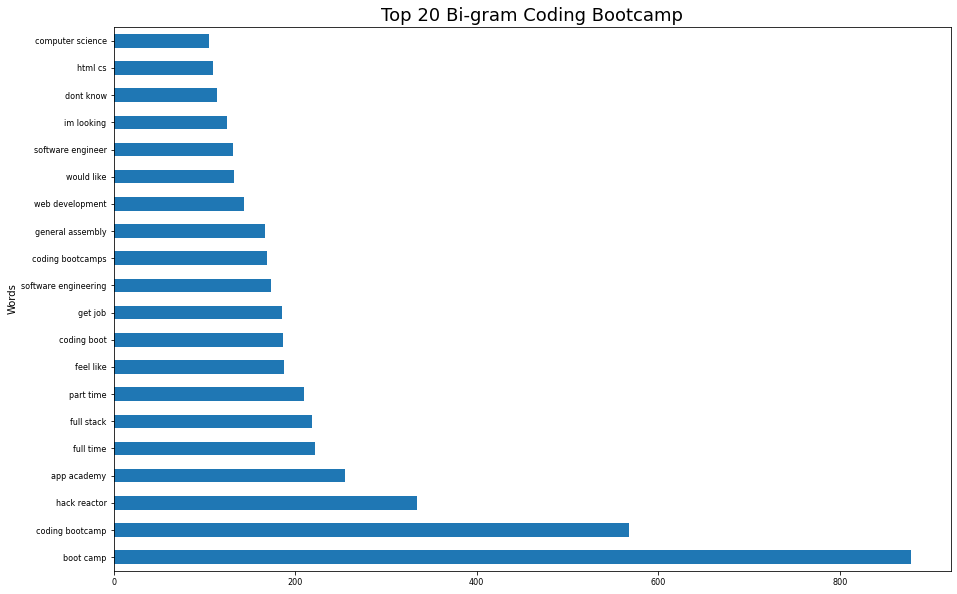

In [64]:
bc_cvec.sum().sort_values(ascending = False).head(20).plot(kind = 'barh',
                                                           figsize=(15,10),
                                                           title = ('Top 20 Bi-gram Coding Bootcamp'),
                                                           ylabel =('Count'),
                                                           xlabel=('Words'))

**TF-IDF**

TF-IDF which stands for term frequency–inverse document frequency is a vectorisation method that is basically a count vectorizer that includes some consideration for the length of the document, and also how common the word is across other text messages.

In [ ]:
#apply tf-idf to cs_major
tfidf_vect = TfidfVectorizer(analyzer='word')
X_tfidf_cs = tfidf_vect.fit_transform(cs_clean['combined_text_clean'])


print(X_tfidf_cs.shape)
print(tfidf_vect.get_feature_names())

#apply to a dataframe
X_tfidf_cs_df = pd.DataFrame(X_tfidf_cs.toarray())
X_tfidf_cs_df.columns = tfidf_vect.get_feature_names()
X_tfidf_cs_df

X_tfidf_cs_df.to_csv('data/cs_tfidf.csv')#save to csv

<AxesSubplot:title={'center':'Top 20 TF-IDF CS Major'}, ylabel='Words'>

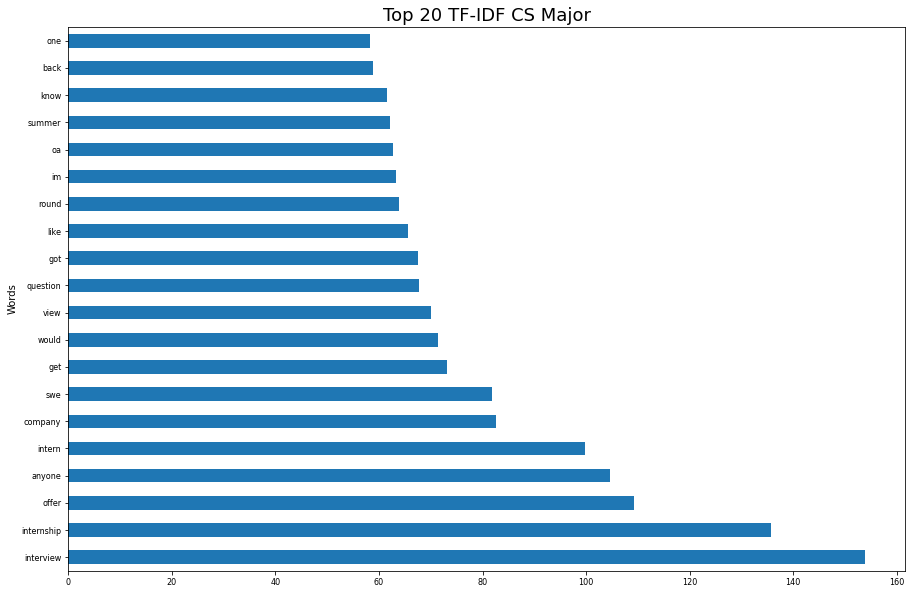

In [63]:
X_tfidf_cs_df.sum().sort_values(ascending = False).head(20).plot(kind = 'barh',
                                                           figsize=(15,10),
                                                           title = ('Top 20 TF-IDF CS Major'),
                                                           ylabel =('Count'),
                                                           xlabel=('Words'))

In [ ]:
#apply tf-idf to coding_bootcamp
tfidf_vect = TfidfVectorizer(analyzer='word')
X_tfidf_bc = tfidf_vect.fit_transform(bc_clean['combined_text_clean'])


print(X_tfidf_bc.shape)
print(tfidf_vect.get_feature_names())

X_tfidf_bc_df = pd.DataFrame(X_tfidf_bc.toarray())
X_tfidf_bc_df.columns = tfidf_vect.get_feature_names()
X_tfidf_bc_df

X_tfidf_bc_df.to_csv('data/bc_tfidf.csv')#save to csv

<AxesSubplot:title={'center':'Top 20 TF-IDF Coding Bootcamp'}, ylabel='Words'>

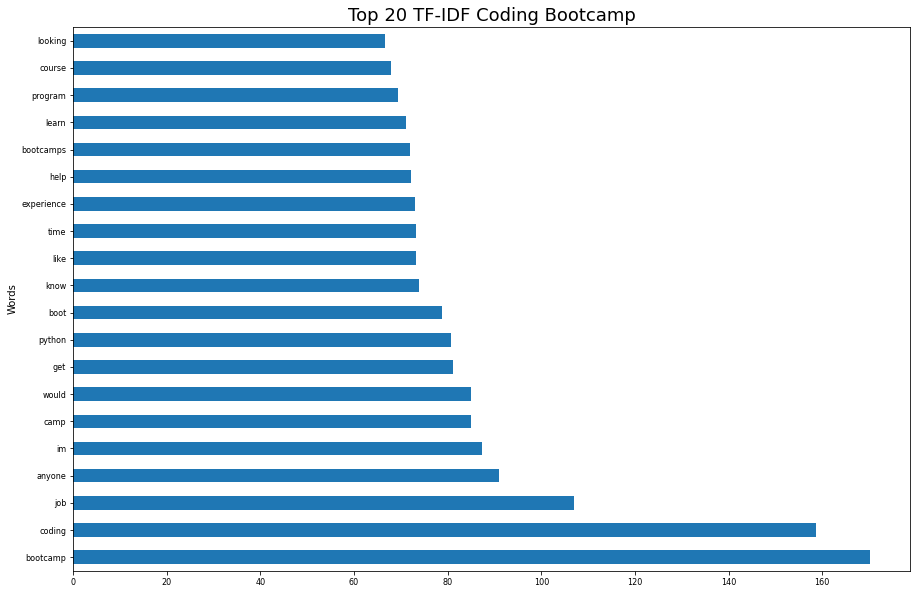

In [61]:
X_tfidf_bc_df.sum().sort_values(ascending = False).head(20).plot(kind = 'barh',
                                                           figsize=(15,10),
                                                           title = ('Top 20 TF-IDF Coding Bootcamp'),
                                                           ylabel =('Count'),
                                                           xlabel=('Words'))

From here we are able to identify a few more stopwords that could be added and which do not contribute to the model.

In [ ]:
new_stopwords = ['like','im','know','boot','would','camp','looking','got','get','one','back','know']

These stopwords will be added to the modelling portion.